In [2]:
# =====================================
# 🧠 PREDICTING DEMAND FOR PERISHABLE GOODS
# =====================================

# --- IMPORT LIBRARIES ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)


In [3]:

# =====================================
# STEP 1: LOAD DATA
# =====================================
product_detail = pd.read_csv("Data\product_details.csv")
store_info = pd.read_csv("Data\store_info.csv")
supplier_info = pd.read_csv("Data\supplier_info.csv")
weather_data = pd.read_csv("Data\weather_data.csv")
weekly_sales = pd.read_csv("Data\weekly_sales.csv")



<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\w'
C:\Users\mm24021\AppData\Local\Temp\ipykernel_22792\4077212443.py:4: SyntaxWarning: invalid escape sequence '\p'
  product_detail = pd.read_csv("Data\product_details.csv")
C:\Users\mm24021\AppData\Local\Temp\ipykernel_22792\4077212443.py:5: SyntaxWarning: invalid escape sequence '\s'
  store_info = pd.read_csv("Data\store_info.csv")
C:\Users\mm24021\AppData\Local\Temp\ipykernel_22792\4077212443.py:6: SyntaxWarning: invalid escape sequence '\s'
  supplier_info = pd.read_csv("Data\supplier_info.cs

In [4]:

# =====================================
# STEP 2: EDA FUNCTION
# =====================================
def eda_stage_1(data, name):
    print("=" * 100)
    print(f"{name} dataset info")
    print(data.info())
    print("=" * 100)
    print(f"{name} dataset shape: {data.shape}")
    print("=" * 100)
    print(f"{name} dataset description")
    print(data.describe())
    print("=" * 100)
    print(f"{name} dataset missing values")
    print(data.isna().sum())
    print("=" * 100)
    print(f"{name} dataset duplicates: {data.duplicated().sum()}")

eda_stage_1(product_detail, "Product Detail")
eda_stage_1(supplier_info, "Supplier Info")
eda_stage_1(store_info, "Store Info")
eda_stage_1(weekly_sales, "Weekly Sales")
eda_stage_1(weather_data, "Weather Data")


Product Detail dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        48 non-null     int64 
 1   Product_Name      48 non-null     object
 2   Product_Category  48 non-null     object
 3   Shelf_Life_Days   48 non-null     int64 
 4   Supplier_ID       48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB
None
Product Detail dataset shape: (48, 5)
Product Detail dataset description
       Product_ID  Shelf_Life_Days  Supplier_ID
count       48.00        48.000000    48.000000
mean      1023.50        59.916667     5.958333
std         14.00        99.226333     2.782608
min       1000.00         2.000000     1.000000
25%       1011.75         4.000000     4.000000
50%       1023.50         7.500000     6.000000
75%       1035.25        36.250000     8.000000
max       1047.00       356.000000  

In [5]:
# =====================================
# STEP 3: BASIC DESCRIPTIVE ANALYSIS
# =====================================
print(f"We have {len(product_detail['Product_Category'].value_counts())} product categories.")
print(f"We have {len(product_detail)} total products in store.")
print(f"The sales dataset covers {len(weekly_sales)} weeks.")
print(f"Total units sold: {weekly_sales['Units_Sold'].sum():,}")
print(f"Total wastage units: {weekly_sales['Wastage_Units'].sum():,}")
print(f"Average wastage units per region: {weekly_sales['Wastage_Units'].mean():,.2f}")


We have 4 product categories.
We have 48 total products in store.
The sales dataset covers 37440 weeks.
Total units sold: 61,482,249
Total wastage units: 4,786,490
Average wastage units per region: 127.84


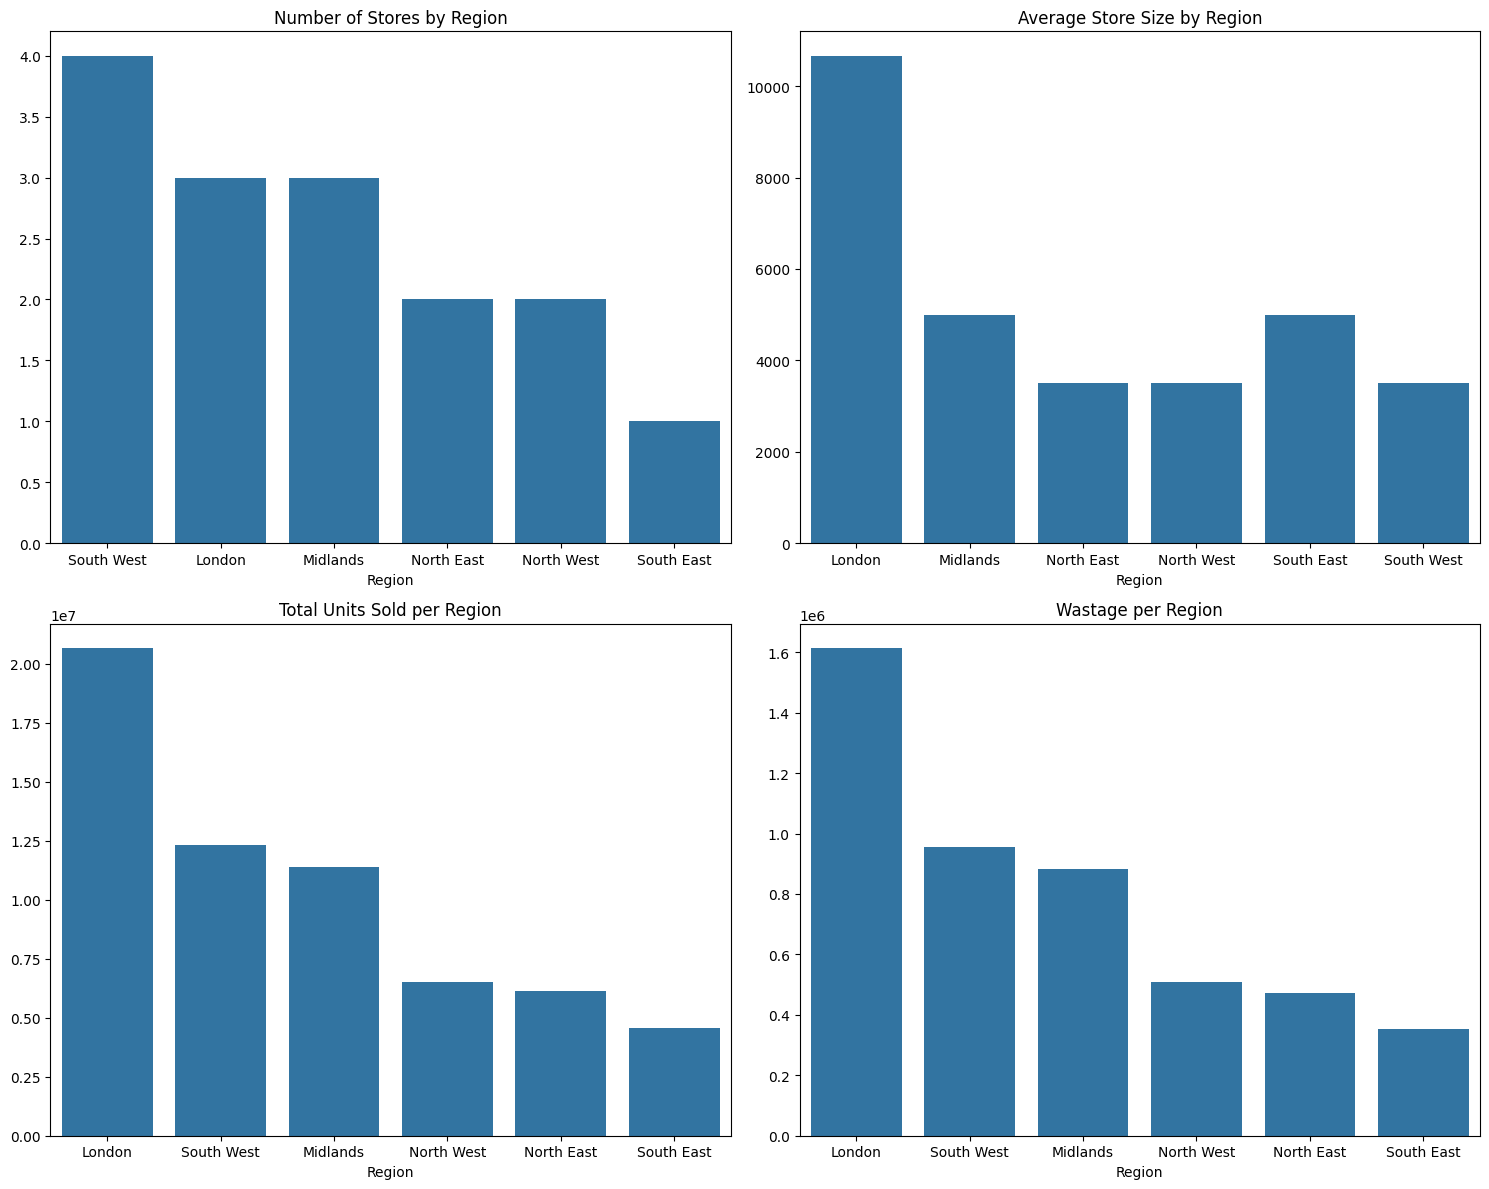

In [6]:
# =====================================
# STEP 4: VISUAL ANALYSIS
# =====================================
# --- Sales and Wastage by Region ---
plt.figure(figsize=(15, 12))

# 1. Stores per Region
plt.subplot(2, 2, 1)
region_store_counts = store_info['Region'].value_counts()
sns.barplot(x=region_store_counts.index, y=region_store_counts.values)
plt.title("Number of Stores by Region")

# 2. Average Store Size
plt.subplot(2, 2, 2)
store_size_by_region = store_info.groupby('Region')['Store_Size'].mean()
sns.barplot(x=store_size_by_region.index, y=store_size_by_region.values)
plt.title("Average Store Size by Region")

# 3. Total Units Sold
plt.subplot(2, 2, 3)
region_sales = weekly_sales.merge(store_info, on="Store_ID")
sales_region = region_sales.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)
sns.barplot(x=sales_region.index, y=sales_region.values)
plt.title("Total Units Sold per Region")

# 4. Total Wastage
plt.subplot(2, 2, 4)
wastage_region = region_sales.groupby('Region')['Wastage_Units'].sum().sort_values(ascending=False)
sns.barplot(x=wastage_region.index, y=wastage_region.values)
plt.title("Wastage per Region")

plt.tight_layout()
plt.show()


C:\Users\mm24021\AppData\Local\Temp\ipykernel_22792\4219390534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


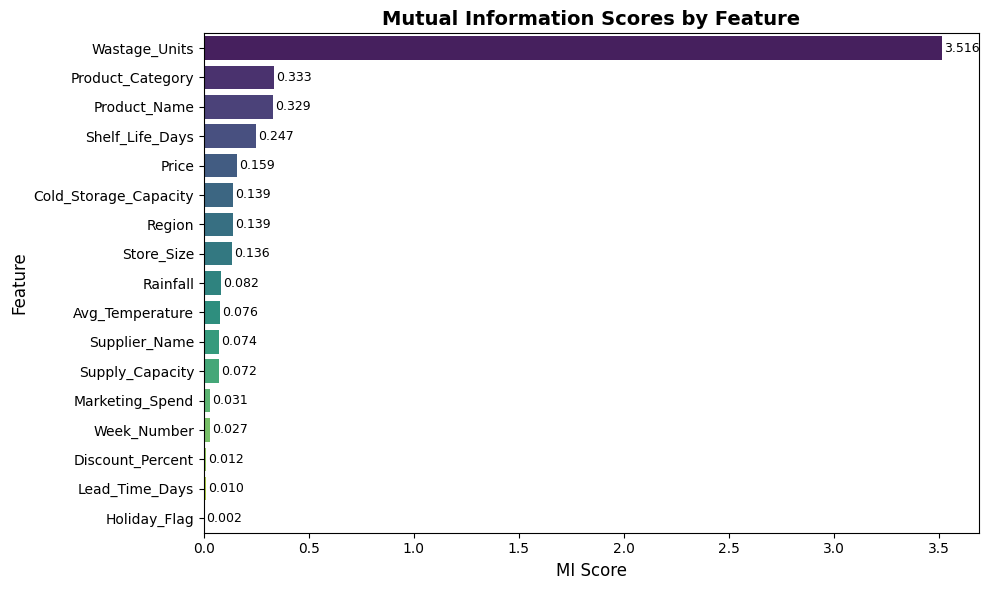

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='MI_Score',
    y='Feature',
    data=feature_importance.sort_values(by='MI_Score', ascending=False),
    palette='viridis'
)

plt.title("Mutual Information Scores by Feature", fontsize=14, fontweight='bold')
plt.xlabel("MI Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Add value labels for clarity
for index, value in enumerate(feature_importance.sort_values(by='MI_Score', ascending=False)['MI_Score']):
    plt.text(value + 0.01, index, f"{value:.3f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [17]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

training_features = feature_importance['Feature'].tolist()


In [18]:
training_features

['Wastage_Units',
 'Product_Category',
 'Product_Name',
 'Shelf_Life_Days',
 'Price',
 'Cold_Storage_Capacity',
 'Region',
 'Store_Size',
 'Rainfall',
 'Avg_Temperature',
 'Supplier_Name',
 'Supply_Capacity',
 'Marketing_Spend',
 'Week_Number',
 'Discount_Percent',
 'Lead_Time_Days',
 'Holiday_Flag']

In [21]:
training_features = feature_importance.head(10)['Feature'].tolist()
training_features


['Wastage_Units',
 'Product_Category',
 'Product_Name',
 'Shelf_Life_Days',
 'Price',
 'Cold_Storage_Capacity',
 'Region',
 'Store_Size',
 'Rainfall',
 'Avg_Temperature']

test

In [22]:

# =====================================
# STEP 5: MERGE ALL DATASETS
# =====================================
merged_data = (
    product_detail
    .merge(weekly_sales, on='Product_ID', how='inner')
    .merge(store_info, on='Store_ID', how='inner')
    .merge(supplier_info, on='Supplier_ID', how='inner')
    .merge(weather_data, on=['Week_Number', 'Region'], how='inner')
)
merged_data

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID,Week_Number,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,...,Price,Region,Store_Size,Cold_Storage_Capacity,Supplier_Name,Lead_Time_Days,Supply_Capacity,Avg_Temperature,Rainfall,Holiday_Flag
0,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,500,4853,670.37,0,...,2.46,London,12000,3788,PremiumGoods Wholesale,3,48776,9.9,23.0,1
1,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,501,1911,1280.28,0,...,3.76,Midlands,5000,1086,PremiumGoods Wholesale,3,48776,7.4,32.1,0
2,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,502,3080,1509.55,0,...,3.81,North East,4000,998,PremiumGoods Wholesale,3,48776,6.4,32.4,0
3,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,503,2856,1101.11,0,...,1.09,Midlands,5000,1243,PremiumGoods Wholesale,3,48776,7.4,32.1,0
4,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,504,3211,1701.66,0,...,2.72,London,10000,3330,PremiumGoods Wholesale,3,48776,9.9,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,1047,Green Tea 40bags,Beverages,92,3,2024-W52,510,1368,1157.55,0,...,1.56,North East,3000,784,FarmDirect Suppliers Ltd.,2,71976,5.2,19.2,1
37436,1047,Green Tea 40bags,Beverages,92,3,2024-W52,511,940,1159.28,0,...,6.49,South West,3000,634,FarmDirect Suppliers Ltd.,2,71976,8.7,16.2,1
37437,1047,Green Tea 40bags,Beverages,92,3,2024-W52,512,1458,662.90,0,...,4.86,South East,5000,1697,FarmDirect Suppliers Ltd.,2,71976,13.7,10.1,1
37438,1047,Green Tea 40bags,Beverages,92,3,2024-W52,513,1311,694.10,0,...,7.36,South West,4000,1322,FarmDirect Suppliers Ltd.,2,71976,8.7,16.2,1


In [23]:

# =====================================
# STEP 6: FEATURE SELECTION (MUTUAL INFORMATION)
# =====================================
from sklearn.feature_selection import mutual_info_regression

target = merged_data['Units_Sold']
X = merged_data.drop(columns=['Units_Sold'])

# Remove ID columns
X.drop(columns=['Product_ID', 'Supplier_ID', 'Store_ID'], inplace=True)

# Encode categorical columns
cat_cols = X.select_dtypes(include='object').columns
for col in cat_cols:
    X[col] = pd.Categorical(X[col]).codes

# Compute MI scores
mi_scores = mutual_info_regression(X, target, random_state=42)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

print(feature_importance.head(10))

# Top 10 Features
training_features = feature_importance.head(10)['Feature'].tolist()
print("Top Predictors:", training_features)


                  Feature  MI_Score
6           Wastage_Units  3.516303
1        Product_Category  0.333410
0            Product_Name  0.328921
2         Shelf_Life_Days  0.247019
7                   Price  0.158909
10  Cold_Storage_Capacity  0.138576
8                  Region  0.138502
9              Store_Size  0.136106
15               Rainfall  0.081719
14        Avg_Temperature  0.075515
Top Predictors: ['Wastage_Units', 'Product_Category', 'Product_Name', 'Shelf_Life_Days', 'Price', 'Cold_Storage_Capacity', 'Region', 'Store_Size', 'Rainfall', 'Avg_Temperature']


In [9]:

# =====================================
# STEP 7: LINEAR REGRESSION MODEL
# =====================================
from sklearn.linear_model import LinearRegression

def train_linear_model(data, training_features):
    X = data[training_features].copy()
    y = data['Units_Sold']

    cat_cols = X.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("Linear Regression Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"MAPE: {mape * 100:.2f}%")
    return model

model_lin = train_linear_model(merged_data, training_features)


Linear Regression Performance:
RMSE: 444.499
R²: 0.857
MAE: 308.641
MAPE: 22.68%


In [10]:
# =====================================
# STEP 8: DECISION TREE REGRESSOR
# =====================================
from sklearn.tree import DecisionTreeRegressor

def train_decision_model(data, training_features):
    X = data[training_features].copy()
    y = data['Units_Sold']

    cat_cols = X.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("Decision Tree Model Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"MAPE: {mape * 100:.2f}%")
    return model

model_tree = train_decision_model(merged_data, training_features)


Decision Tree Model Performance:
RMSE: 27.640
R²: 0.999
MAE: 9.110
MAPE: 0.69%


In [11]:

# =====================================
# STEP 9: RANDOM FOREST REGRESSOR
# =====================================
from sklearn.ensemble import RandomForestRegressor

def train_rf_model(data, training_features):
    X = data[training_features].copy()
    y = data['Units_Sold']

    cat_cols = X.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("Random Forest Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"MAPE: {mape * 100:.2f}%")
    return model

model_rf = train_rf_model(merged_data, training_features)


Random Forest Performance:
RMSE: 33.732
R²: 0.999
MAE: 12.544
MAPE: 0.84%


In [12]:

# =====================================
# STEP 10: XGBOOST REGRESSOR
# =====================================
from xgboost import XGBRegressor

def train_xg_model(data, training_features):
    X = data[training_features].copy()
    y = data['Units_Sold']

    cat_cols = X.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = XGBRegressor(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        objective='reg:squarederror'
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("XGBoost Model Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"MAPE: {mape * 100:.2f}%")

    return model

model_xgb = train_xg_model(merged_data, training_features)


XGBoost Model Performance:
RMSE: 80.909
R²: 0.995
MAE: 16.526
MAPE: 0.83%
